In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
from sklearn.metrics import mean_squared_error
from collections import Counter
import scipy as scipy
import itertools
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [174]:
X = [22, 34, 24, 35, 36, 39, 42, 45, 48, 51, 53, 56, 59, 62, 65, 68, 71, 74, 77, 80]
Y = [23, 45, 41, 54, 63, 72, 81, 120, 99, 79, 117, 130, 128, 165, 153, 170, 165, 150, 170, 198]
df = pd.DataFrame({
    'X': X,
    'Y': Y,
})
df['X^2'] = df['X']**2
df['XY'] = df['X'] * df['Y']
x_median, y_median = sts.median(X), sts.median(Y)
n = len(df['X'])
df.head()

,X,Y,X^2,XY
0,22,23,484,506
1,34,45,1156,1530
2,24,41,576,984
3,35,54,1225,1890
4,36,63,1296,2268


In [175]:
r = df['X'].corr(df['Y'])
sd_x = sts.stdev(df['X'])
sd_y = sts.stdev(df['Y'])

a = r * (sd_y/sd_x)
b = y_median - (r * (sd_y/sd_x) * x_median)
df['f(x)'] = a*df['X'] + b

print('r = ', r)
print('sd_x = ', sd_x)
print('sd_y = ', sd_y)
print('b = ', b)
print('a = ', a)
df.head()

r =  0.9618327009976747
sd_x =  17.370498280887507
sd_y =  51.58363163476937
b =  -30.02601191358724
a =  2.856269459876678


,X,Y,X^2,XY,f(x)
0,22,23,484,506,32.811916
1,34,45,1156,1530,67.087150
2,24,41,576,984,38.524455
3,35,54,1225,1890,69.943419
4,36,63,1296,2268,72.799689


In [263]:
A = np.vstack([df['X'], np.ones(len(df['X']))]).T
a , b = np.linalg.lstsq(A, df['Y'], rcond=None)[0]
df['f(x)_2'] = a*df['X'] + b
df.head()

,X,Y,X^2,XY,f(x),f(x)_2,y_pred,y_pred_2,y_pred_3
0,22,23,484,506,32.811916,25.319103,22.182954,25.319103,25.319103
1,34,45,1156,1530,67.087150,59.594336,59.477339,59.594336,59.594336
2,24,41,576,984,38.524455,31.031642,28.505417,31.031642,31.031642
3,35,54,1225,1890,69.943419,62.450606,62.515828,62.450606,62.450606
4,36,63,1296,2268,72.799689,65.306875,65.543645,65.306875,65.306875


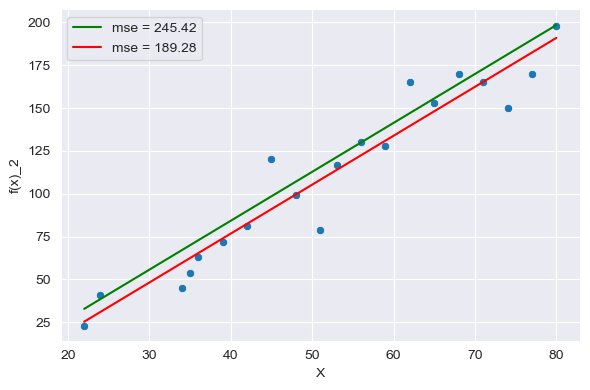

In [184]:
mse_one = mean_squared_error(df['Y'], df['f(x)'])
mse_two = mean_squared_error(df['Y'], df['f(x)_2'])
ax = sns.relplot(kind='scatter', x='X', y='Y', data=df, height=4, aspect=1.5)
ax.map_dataframe(sns.lineplot, 'X', 'f(x)', color='green', label='mse = '+str(round(mse_one, 2)))
ax.map_dataframe(sns.lineplot, 'X', 'f(x)_2', color='red', label='mse = '+str(round(mse_two, 2)))
plt.legend()
plt.show()

In [207]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(A)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, df['Y'])
y_predicted = poly_reg_model.predict(poly_features)
df['y_pred'] = y_predicted

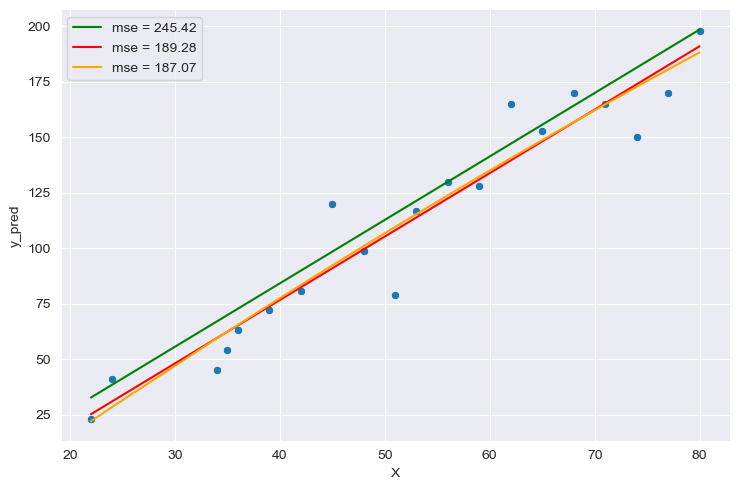

In [264]:
mse_one = mean_squared_error(df['Y'], df['f(x)'])
mse_two = mean_squared_error(df['Y'], df['f(x)_2'])
mse_three = mean_squared_error(df['Y'], df['y_pred'])
ax = sns.relplot(kind='scatter', x='X', y='Y', data=df, height=5, aspect=1.5)
ax.map_dataframe(sns.lineplot, 'X', 'f(x)', color='green', label='mse = '+str(round(mse_one, 2)))
ax.map_dataframe(sns.lineplot, 'X', 'f(x)_2', color='red', label='mse = '+str(round(mse_two, 2)))
ax.map_dataframe(sns.lineplot, 'X', 'y_pred', color='orange', label='mse = '+str(round(mse_three, 2)))
plt.legend()
plt.show()

In [225]:
df.head()

,X,Y,X^2,XY,f(x),f(x)_2,y_pred
0,22,23,484,506,32.811916,25.319103,22.182954
1,34,45,1156,1530,67.087150,59.594336,59.477339
2,24,41,576,984,38.524455,31.031642,28.505417
3,35,54,1225,1890,69.943419,62.450606,62.515828
4,36,63,1296,2268,72.799689,65.306875,65.543645


In [260]:
print('mse = ', mean_squared_error(df['Y'], df['f(x)']))

a = ((sum(df['XY'])/n) - (sum(df['X'])/n) * (sum(df['Y'])/n)) / ( (sum(df['X^2'])/n) - (sum(df['X'])/n)**2 )
b = (sum(df['Y'])/n) - a*(sum(df['X'])/n)

print('a = ', a)
print('b = ', b)

a_new, b_new = np.linalg.lstsq(A, df['Y'], rcond=None)[0]

mse =  245.42055548799704
a =  2.8562694598766782
b =  -37.518825386581085


In [262]:
# df['f(x)'].drop()
df['y_pred_3'] = a_new * df['X'] + b_new
df

,X,Y,X^2,XY,f(x),f(x)_2,y_pred,y_pred_2,y_pred_3
0,22,23,484,506,32.811916,25.319103,22.182954,25.319103,25.319103
1,34,45,1156,1530,67.087150,59.594336,59.477339,59.594336,59.594336
2,24,41,576,984,38.524455,31.031642,28.505417,31.031642,31.031642
3,35,54,1225,1890,69.943419,62.450606,62.515828,62.450606,62.450606
4,36,63,1296,2268,72.799689,65.306875,65.543645,65.306875,65.306875
5,39,72,1521,2808,81.368497,73.875684,74.563055,73.875684,73.875684
6,42,81,1764,3402,89.937305,82.444492,83.486406,82.444492,82.444492
7,45,120,2025,5400,98.506114,91.013300,92.313698,91.013300,91.013300
8,48,99,2304,4752,107.074922,99.582109,101.044931,99.582109,99.582109
9,51,79,2601,4029,115.643731,108.150917,109.680106,108.150917,108.150917
